In [107]:
import math
import astropy.units as u

global C
global B
global RHO
global E

E = 3e-4
RHO = 0.07
B = 8800
C = 1 

MASS_MUON = 106
MASS_PION = 140


def massMuon(radius):
    global C
    global B
    global E
    return 3*E*B*radius/.785
    

def kineticEnergyMuon(radius, length):
    global RHO
    global C
    return math.sqrt(2.1*massMuon(radius)*(C**2)*RHO*length)
    

def massPion(radius,length):
    global C
    return (math.sqrt(kineticEnergyMuon(radius, length)**2 + 2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2) 
                     + (massMuon(radius)*(C**2))**2) + math.sqrt(kineticEnergyMuon(radius, length)**2 + 
                     2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2)))/(C**2)

In [108]:
fle = open('data.csv', 'r')
raw = fle.read()
fle.close()

parsed = raw.split('\n')[1:]
data = []
for p in parsed:
    temp = p.split(',')
    if temp[1]:
        temp[1] = float(temp[1])
    else:
        temp[1] = None
    if temp[2]:
        temp[2] = float(temp[2])
    else:
        temp[2] = None
    data.append(tuple(temp[1:]))

sum_radius = 0
sum_length = 0
count_radius = 0
count_length = 0

for d in data:
    if d[1]:
        sum_radius += d[1]
        count_radius += 1
    if d[0]:
        sum_length += d[0]
        count_length += 1

avg_radius = (sum_radius/count_radius)
avg_length = (sum_length/count_length)*.785

print(massMuon(avg_radius))
print(MASS_MUON)
print(massPion(avg_radius, avg_length))
print(MASS_PION)

114.14000854208832
106
146.9558572409021
140


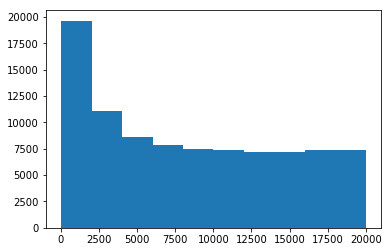

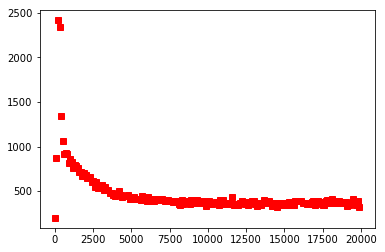

In [139]:
import matplotlib.pyplot as plt

fle = open('exp_data.csv', 'r')
raw = fle.read()
fle.close()

parse = raw.split('\n')[1:]
data = []
for p in parse:
    temp = p.split(',')
    data.append(int(temp[0]))

plt.hist(data)
plt.show()
    
num_bins = 200
div = 20000 // num_bins

bins = [0] *num_bins
max_value = [n*div for n in range(num_bins)]
for d in data:
    bins[d//div] += 1

plt.plot(max_value, bins, 'rs')
plt.show()